In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
dataset=pd.read_csv('housing.csv')

In [11]:
len(dataset)

506

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [19]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


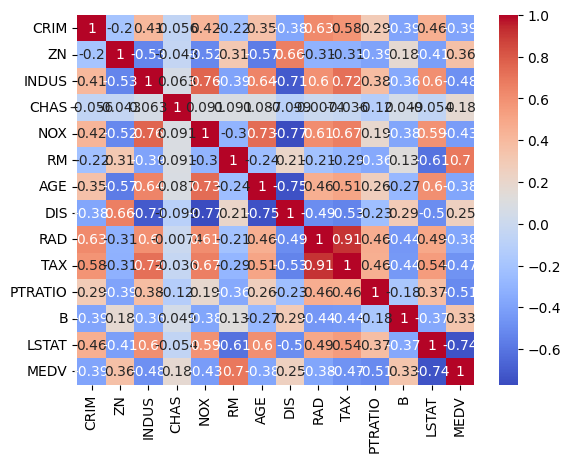

In [20]:
dataset.isnull().sum()

dataset.corr()
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [13]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


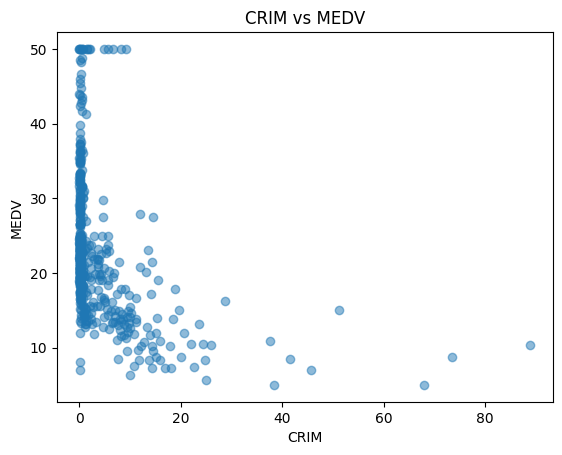

In [31]:
plt.scatter(dataset['CRIM'],dataset['MEDV'],alpha=0.5)
plt.title('CRIM vs MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()


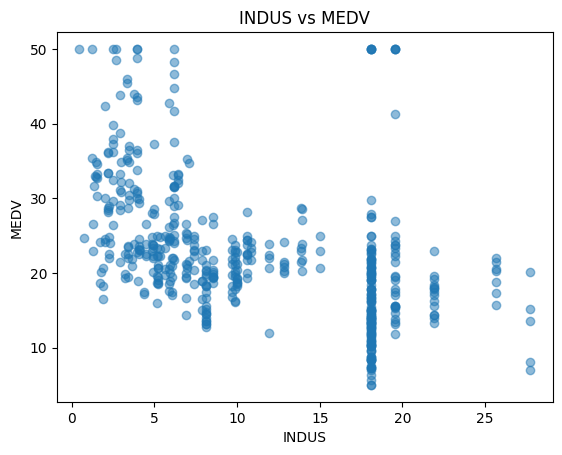

In [30]:
plt.scatter(dataset['INDUS'],dataset['MEDV'],alpha=0.5)
plt.title('INDUS vs MEDV')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.show()


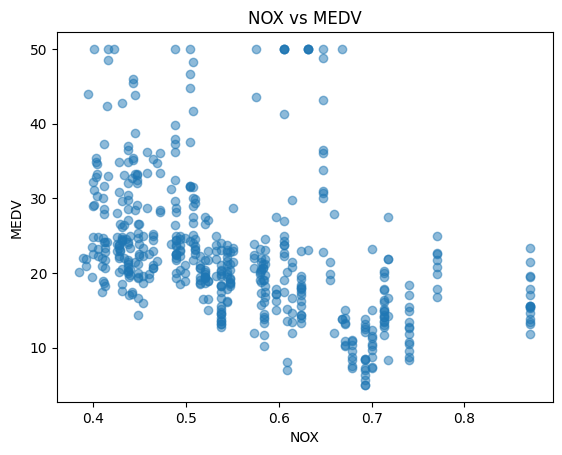

In [32]:
plt.scatter(dataset['NOX'],dataset['MEDV'],alpha=0.5)
plt.title('NOX vs MEDV')
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.show()

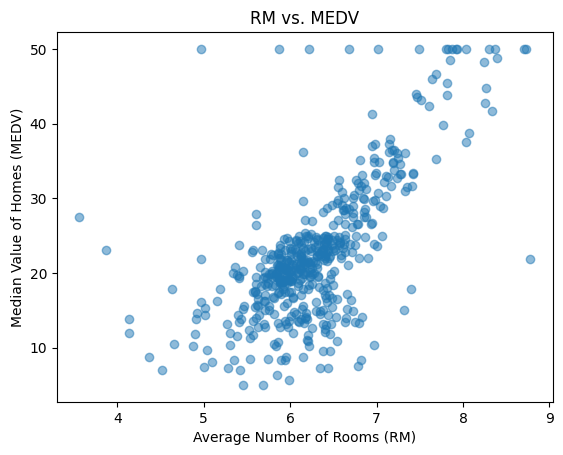

In [22]:
plt.scatter(dataset['RM'], dataset['MEDV'], alpha=0.5)
plt.title('RM vs. MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()


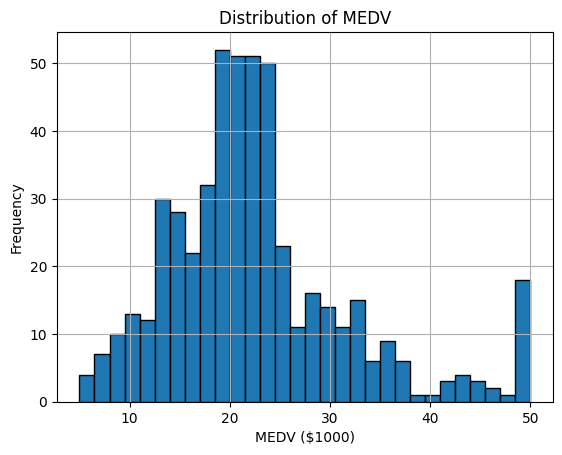

In [21]:
dataset['MEDV'].hist(bins=30, edgecolor='black')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV ($1000)')
plt.ylabel('Frequency')
plt.show()


In [39]:
#now here we create dependent and independent variable
X=dataset.drop(['MEDV'],axis=1)
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [40]:
Y=dataset['MEDV']
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [41]:
#we split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
X_train[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08
335,0.03961,0.0,5.19,0,0.5150,6.037,34.5,5.9853,5,224,20.2,396.90,8.01
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
437,15.17720,0.0,18.10,0,0.7400,6.152,100.0,1.9142,24,666,20.2,9.32,26.45
409,14.43830,0.0,18.10,0,0.5970,6.852,100.0,1.4655,24,666,20.2,179.36,19.78


In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train[0:10]

array([[1.68762759e-01, 0.00000000e+00, 6.42962963e-01, 0.00000000e+00,
        4.71193416e-01, 2.93064877e-01, 9.72193615e-01, 8.83067046e-02,
        1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 8.80427656e-01,
        6.39624724e-01],
       [6.95009416e-03, 0.00000000e+00, 2.74074074e-01, 0.00000000e+00,
        3.14814815e-01, 4.00854179e-01, 5.52008239e-01, 3.06359065e-01,
        1.30434783e-01, 2.29007634e-01, 8.93617021e-01, 9.96772404e-01,
        1.85982340e-01],
       [2.87746689e-04, 3.50000000e-01, 1.97037037e-01, 0.00000000e+00,
        1.08847737e-01, 4.40919260e-01, 2.10092688e-01, 5.01150324e-01,
        0.00000000e+00, 2.23282443e-01, 4.57446809e-01, 9.12627969e-01,
        1.68322296e-01],
       [7.91456261e-02, 0.00000000e+00, 6.42962963e-01, 0.00000000e+00,
        4.71193416e-01, 4.55562335e-01, 8.46549949e-01, 8.11319554e-02,
        1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 5.54743053e-03,
        5.94922737e-01],
       [8.05623290e-03, 0.00000000e+

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor.intercept_

25.00690272455914

In [47]:
regressor.coef_

array([-10.05826222,   3.01104641,   1.09027945,   2.7844382 ,
        -8.36047983,  21.82575268,  -0.61137677, -15.92203067,
         6.03588392,  -5.57891601,  -8.60528866,   4.89829233,
       -18.43062842])

In [48]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.291119474973502
R-squared: 0.6687594935356322


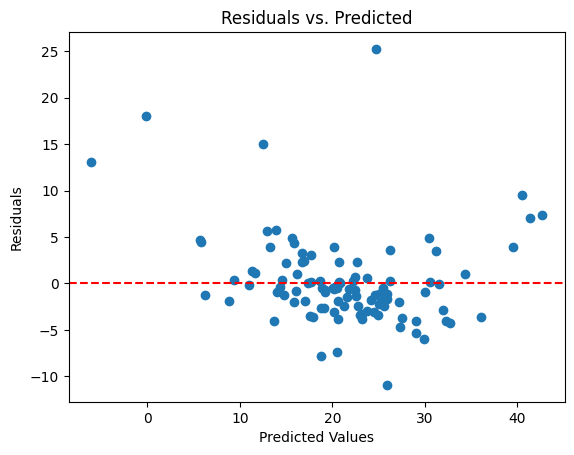

In [49]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
